# Dask

We have previously created an environment and installed dask library

Dask is a pure python framework, it allows to run numpy or pandas using the same code

Apache Spark involves an API

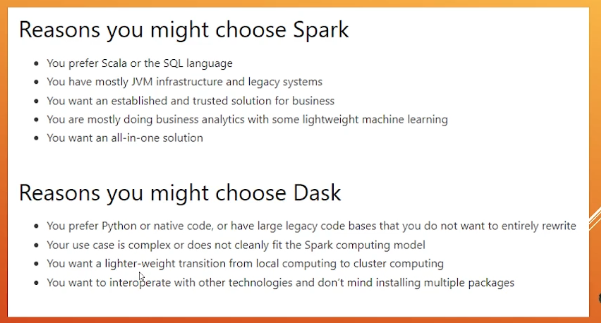

# Dask arrays

In [2]:
import dask.array as da
import numpy as np

In [2]:
np_array=np.random.randint(low=1,high=20, size=10)
np_array

array([17, 15, 13, 14, 12,  3, 18,  1,  8, 18])

In [3]:
dask_array= da.random.randint(low=1,high=20, size=10,chunks=5)
dask_array # lazy evaluation, to see the values we need to write compute()

dask.array<randint, shape=(10,), dtype=int64, chunksize=(5,), chunktype=numpy.ndarray>

In [11]:
dask_array.compute()

array([17, 15, 13, 14, 12,  3, 18,  1,  8, 18])

In [8]:
#chunck size
dask_array.chunks

((2, 2, 2, 2, 2),)

In [6]:
#creating dask arrays from existing np array
dask_array=da.from_array(np_array,chunks=2)
dask_array

dask.array<array, shape=(10,), dtype=int64, chunksize=(2,), chunktype=numpy.ndarray>

## Dask translates your array operations into a graph to tasks

need to install graphviz (brew install graphviz)

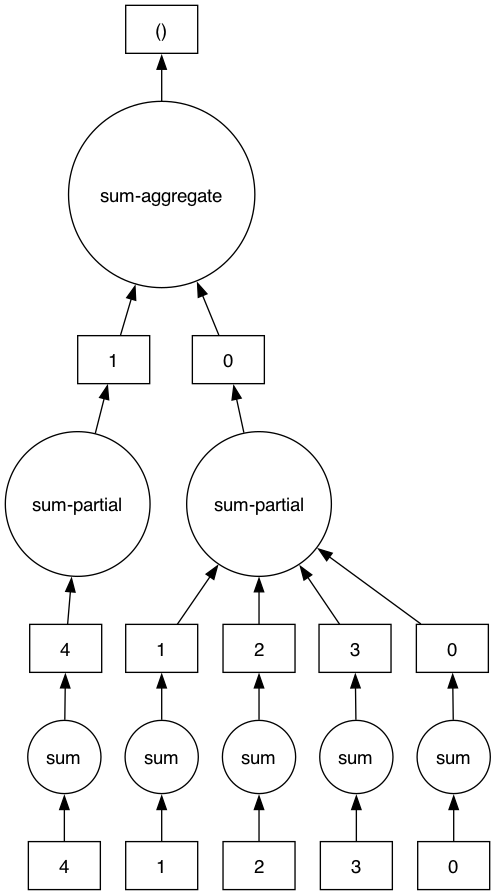

In [7]:
dask_array.sum().visualize()

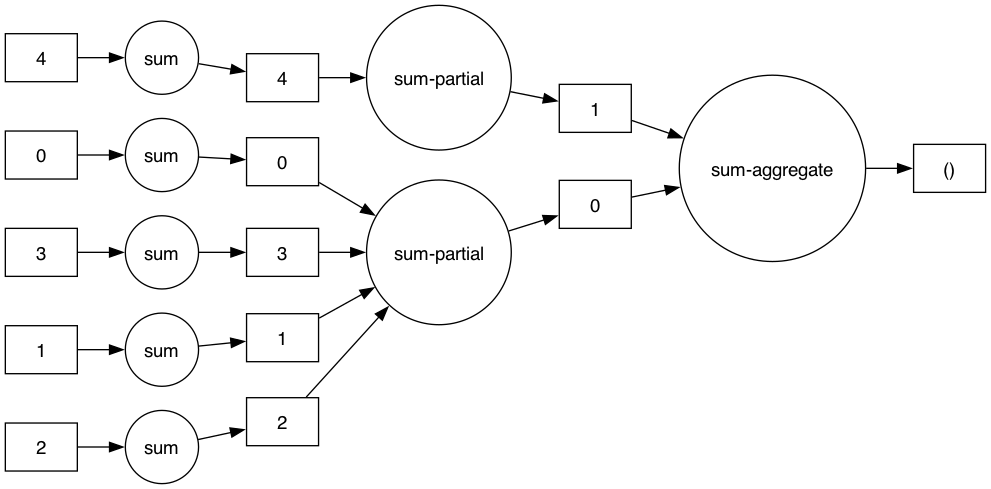

In [9]:
dask_array.sum().visualize(rankdir='LR')

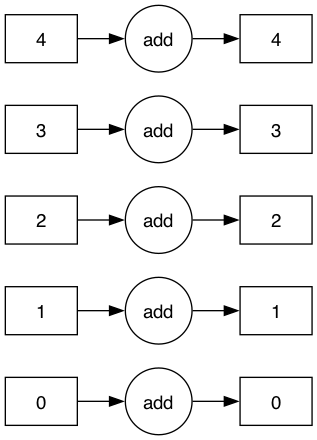

In [12]:
(dask_array+1).visualize(rankdir='LR')

In [14]:
#mean
mean=dask_array.mean()
mean.compute()

np.float64(11.9)

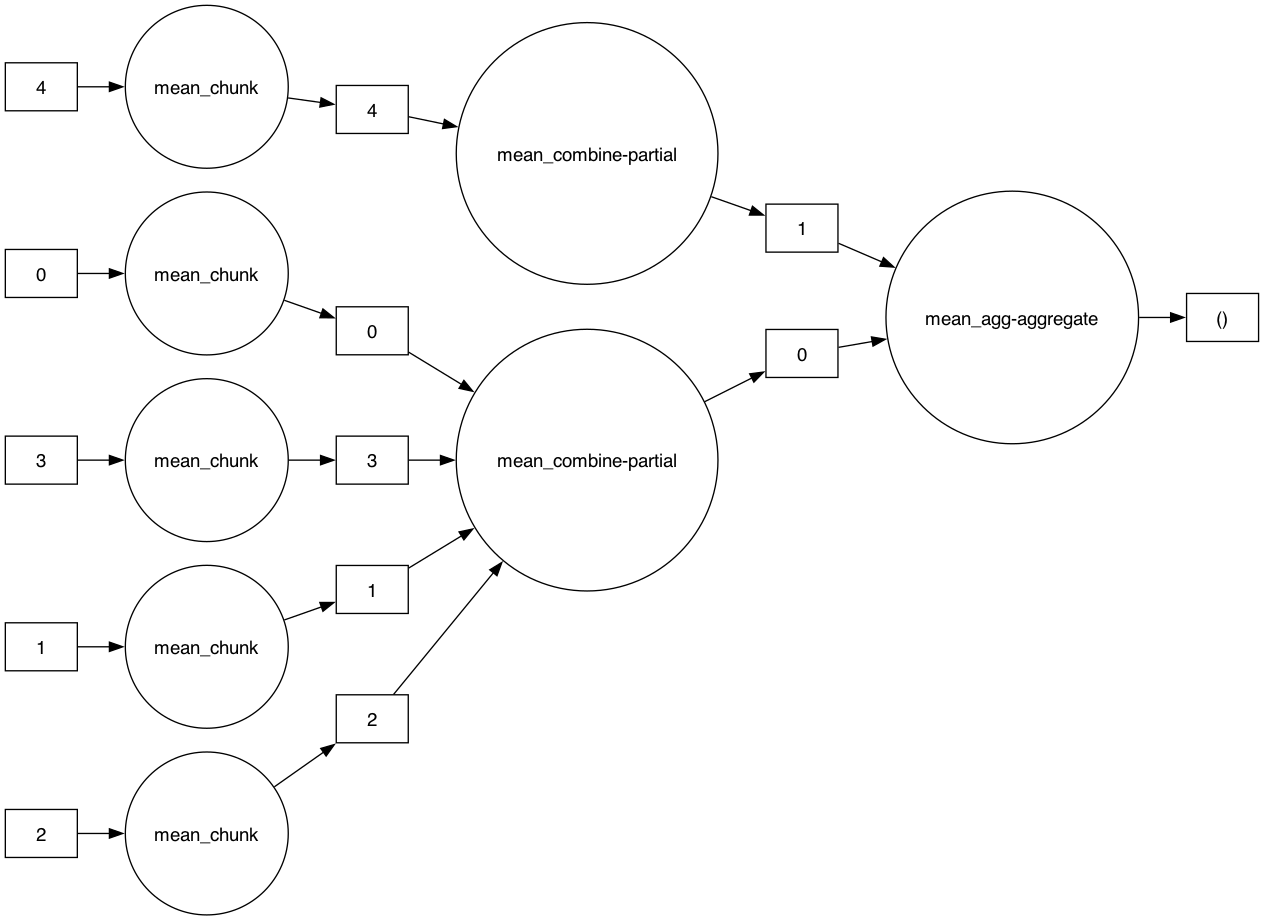

In [15]:
mean.visualize(rankdir='LR')

## Example with a larger array

In [25]:
dask_array=da.random.randint(low=0,high=10, size=(50000,50000),chunks=(5000,1000))


In [26]:
dask_array.nbytes # how many bytes is using

20000000000

In [28]:
dask_array.nbytes/1e+9 # gigas

20.0

In [29]:
dask_array.sum().compute()

np.int64(11250129351)

## Other operations

In [5]:
import dask.array as da
dask_array=da.random.randint(low=0,high=10,size=20,chunks=2)
dask_array.compute()


array([4, 1, 9, 0, 5, 2, 1, 2, 0, 1, 3, 8, 9, 2, 2, 1, 0, 5, 4, 0])

In [6]:
#Ssum
(dask_array+100).compute()

array([104, 101, 109, 100, 105, 102, 101, 102, 100, 101, 103, 108, 109,
       102, 102, 101, 100, 105, 104, 100])

In [7]:
#mult
(dask_array * (-1)).compute()

array([-4, -1, -9,  0, -5, -2, -1, -2,  0, -1, -3, -8, -9, -2, -2, -1,  0,
       -5, -4,  0])

In [10]:
ones=da.ones((10,10),chunks=2)
ones.compute()

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [11]:
ones.mean(axis=1).compute()

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
dask_array=da.random.randint(10, size=(4,4),chunks=(1,4))
dask_array

dask.array<randint, shape=(4, 4), dtype=int64, chunksize=(1, 4), chunktype=numpy.ndarray>

In [15]:
dask_array.compute()

array([[8, 9, 0, 4],
       [1, 2, 7, 0],
       [4, 9, 8, 1],
       [6, 0, 0, 6]])

In [18]:
#Subset of an array
dask_array[1:3,2:4].compute()

array([[7, 0],
       [8, 1]])

In [19]:
#Broadcasting
small_array=da.ones(4,chunks=2)
small_array.compute()

array([1., 1., 1., 1.])

In [22]:
da.add(dask_array,small_array).compute()
[[8, 9, 0, 4],     [[1, 1, 1, 1],
 [1, 2, 7, 0],      [1, 1, 1, 1],
 [4, 9, 8, 1],  +   [1, 1, 1, 1],
 [6, 0, 0, 6]]      [1, 1, 1, 1]]

array([[ 9., 10.,  1.,  5.],
       [ 2.,  3.,  8.,  1.],
       [ 5., 10.,  9.,  2.],
       [ 7.,  1.,  1.,  7.]])

In [24]:
da.full_like(small_array,199).compute()

array([199., 199., 199., 199.])

In [27]:
#RESHAPING
dask_array.reshape(16).compute()

array([8, 9, 0, 4, 1, 2, 7, 0, 4, 9, 8, 1, 6, 0, 0, 6])

In [35]:
# STACKING
dask_array2=da.random.randint(low=-10,high=10,size=(4,4),chunks=4)
dask_array2.compute()

array([[ -8,  -4,  -9,   9],
       [ -4,   8,   3, -10],
       [  4,   8,  -8,  -8],
       [ -8,   0,   6,  -4]])

In [38]:
da.stack([dask_array,dask_array2],axis=0).compute()

array([[[  8,   9,   0,   4],
        [  1,   2,   7,   0],
        [  4,   9,   8,   1],
        [  6,   0,   0,   6]],

       [[ -8,  -4,  -9,   9],
        [ -4,   8,   3, -10],
        [  4,   8,  -8,  -8],
        [ -8,   0,   6,  -4]]])

In [39]:
da.concatenate([dask_array,dask_array2],axis=0).compute()

array([[  8,   9,   0,   4],
       [  1,   2,   7,   0],
       [  4,   9,   8,   1],
       [  6,   0,   0,   6],
       [ -8,  -4,  -9,   9],
       [ -4,   8,   3, -10],
       [  4,   8,  -8,  -8],
       [ -8,   0,   6,  -4]])

## Comparison with Numpy Arrays

In [4]:
size_tuple=(180000,180000) # las tuplas no pueden ser cambiadas unas vez definidas
np_array=np.random.randint(10,size=size_tuple)
np_array2=np.random.randint(10,size=size_tuple)

: 

In [50]:
%time (((np_array*2).T)** 2 + np_array2 + 100).sum(axis=1).mean()

CPU times: user 2.33 s, sys: 4.31 s, total: 6.64 s
Wall time: 8.87 s


np.float64(3933044.1519444445)

In [3]:
dask_array=da.random.randint(10,size=size_tuple)
dask_array2=da.random.randint(10,size=size_tuple)
%time (((dask_array*2).T)** 2 + dask_array2 + 100).sum(axis=1).mean().compute()

NameError: name 'size_tuple' is not defined

## Universal Numpy Fuctions with Dask

In [1]:
import numpy as np
import dask.array as da

In [2]:
size_tuple=(500,500)
chunks_tuple=(10,500)

dask_array=da.random.randint(10,size=size_tuple,chunks=chunks_tuple)
dask_array2=da.random.randint(10,size=size_tuple,chunks=chunks_tuple)

In [5]:
def random_func(x):
    return np.mean((((x*2).T) ** 2),axis=0)

In [7]:
#Universal fucntion
uf= da.gufunc(random_func, signature="(i)->()",output_dtypes=float,vectorize=True)
uf(dask_array).compute()

array([113.704, 112.928, 115.312, 114.52 , 113.928, 112.4  , 114.728,
       108.752, 114.416, 119.032, 115.032, 112.344, 112.304, 120.32 ,
       117.368, 116.36 , 116.472, 115.968, 112.32 , 111.656, 113.04 ,
       116.008, 118.064, 109.016, 113.888, 115.208, 115.808, 120.488,
       115.36 , 114.72 , 118.016, 126.84 , 116.024, 109.512, 111.568,
       114.432, 114.808, 108.6  , 105.152, 114.904, 110.768, 113.048,
       105.536, 116.248, 112.064, 117.384, 110.6  , 111.664, 107.504,
       111.792, 112.696, 105.48 , 115.104, 112.008, 111.096, 116.888,
       118.464, 120.184, 115.64 , 109.336, 116.2  , 114.896, 107.928,
       119.424, 123.232, 116.072, 113.144, 117.16 , 116.672, 123.608,
       119.568, 111.664, 108.032, 114.72 , 120.808, 111.048, 108.672,
       115.592, 113.464, 116.104, 120.   , 107.168, 118.72 , 112.264,
       116.04 , 107.96 , 119.512, 108.776, 118.704, 118.64 , 117.488,
       117.248, 108.752, 113.376, 110.28 , 108.2  , 117.928, 121.912,
       115.64 , 117.

# Lazy evaluation

Lazy evaluation or call_by_need is used in Parallel Compiting. It queues a set of instructions to run later in parallell

It does not give the result immediatly, it can reduce the running time of certain functions 

In [10]:

def my_gen(a,b):
    a= a+10
    b=b-10
    yield a,b

In [12]:
my_gen(9,10)

<generator object my_gen at 0x117bc98a0>

In [13]:
next(my_gen(9,10))

(19, 0)

# Dask.delayed

Sometimes problems do not fit into dask.array or dask.dataframe. In such cases, users can parallelize custome algorithms using the simpler dask.delayed interface. In simple terms, it wraps the existing python code and make mode parallel. it returns a lazy object.

In [14]:
def fun1(x,y):
    return x+y+ 2*x*y

def fun2(a,b):
    return a**3 -b**3

def fun3(p,q):
    return p*p + q*q

In [16]:
x=[2,4,6,8,10]
y=[3,6,9,12,15]
z=[10,20,30,40,50]

final_result=[]

for i in range(len(x)):
    res1=fun1(x[i],y[i])
    res2=fun2(y[i],z[i])
    res3=fun3(res1,res2)
    final_result.append(res3)

%time final_result

CPU times: user 1e+03 ns, sys: 1 μs, total: 2 μs
Wall time: 9.06 μs


[947018, 60594020, 690180570, 3877846928, 14792746250]

In [17]:
sum(final_result)

19422314786

In [22]:
# USING DASK.DELAYED
from dask import delayed, compute

for i in range(len(x)):
    #wrapping
    res1=delayed(fun1)(x[i],y[i])
    res2=delayed(fun2)(y[i],z[i])
    res3=delayed(fun3)(res1,res2)
    final_result.append(res3)

%time final_sum=delayed(sum)(final_result)
final_sum

CPU times: user 243 μs, sys: 46 μs, total: 289 μs
Wall time: 431 μs


Delayed('sum-7f90571d-b5b9-4261-a037-92daf3fcdca4')

In [23]:
final_sum.compute()

97111573930

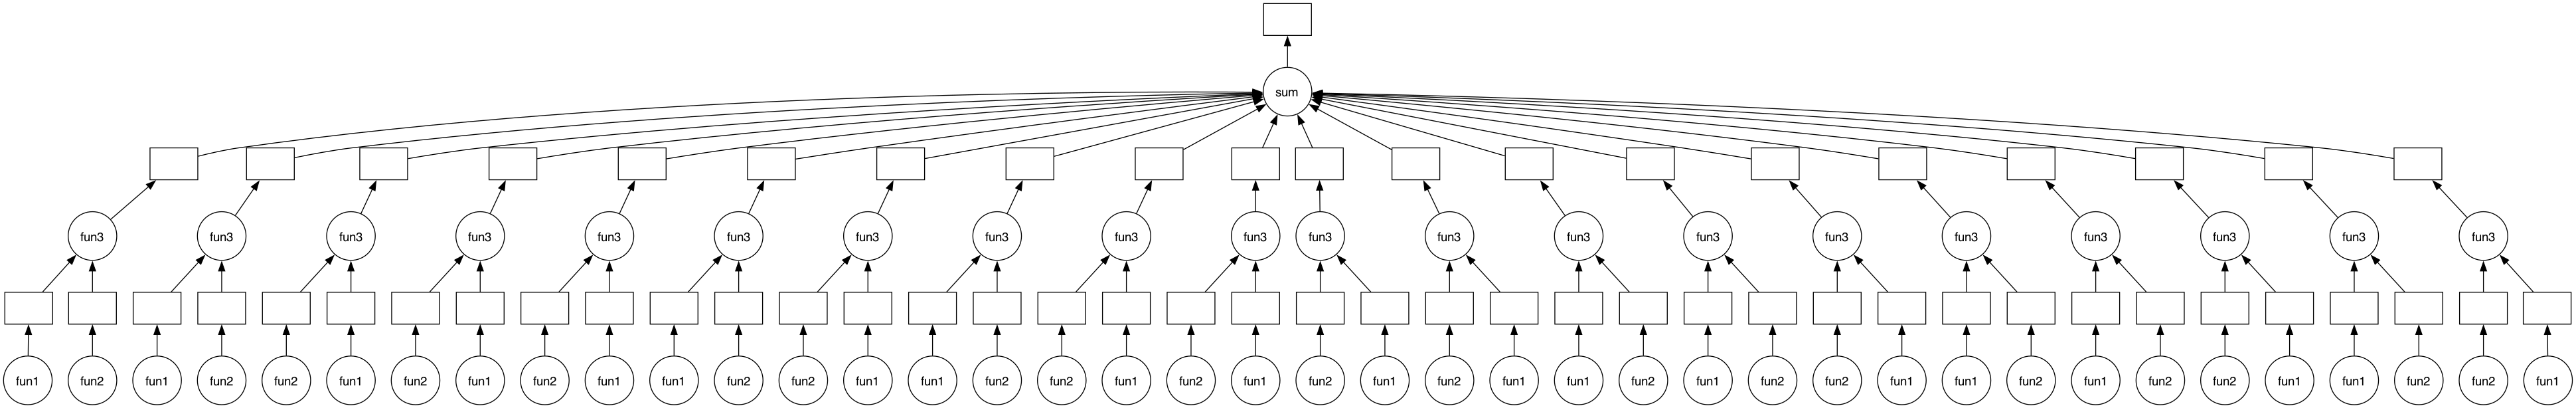

In [24]:
final_sum.visualize()

In [25]:
# ANOTHER WAY using @DELAYED
@delayed
def fun1(x,y):
    return x+y+ 2*x*y

@delayed
def fun2(a,b):
    return a**3 -b**3

@delayed
def fun3(p,q):
    return p*p + q*q

final_result=[]

In [26]:
for i in range(len(x)):
    res1=fun1(x[i],y[i])
    res2=fun2(y[i],z[i])
    res3=fun3(res1,res2)
    final_result.append(res3)

%time final_result

CPU times: user 2 μs, sys: 1 μs, total: 3 μs
Wall time: 11 μs


[Delayed('fun3-1f32eb58-b537-43bc-8d0a-575ac5038c8d'),
 Delayed('fun3-8ebc17cc-b9b9-4e44-b4b4-3bfcc1a0fcc1'),
 Delayed('fun3-0bc94abd-3559-413a-9b7d-8edcd4b2c032'),
 Delayed('fun3-0cb5721f-03e2-4338-8e4e-2efe7a72a3a0'),
 Delayed('fun3-289e42be-9bfe-4e0f-b4d3-7850dfd72203')]

In [28]:
suma=delayed(sum) (final_result)
suma

Delayed('sum-f291bd9f-80e4-4466-868b-4eaf6dad9950')

In [29]:
suma.compute()

19422314786

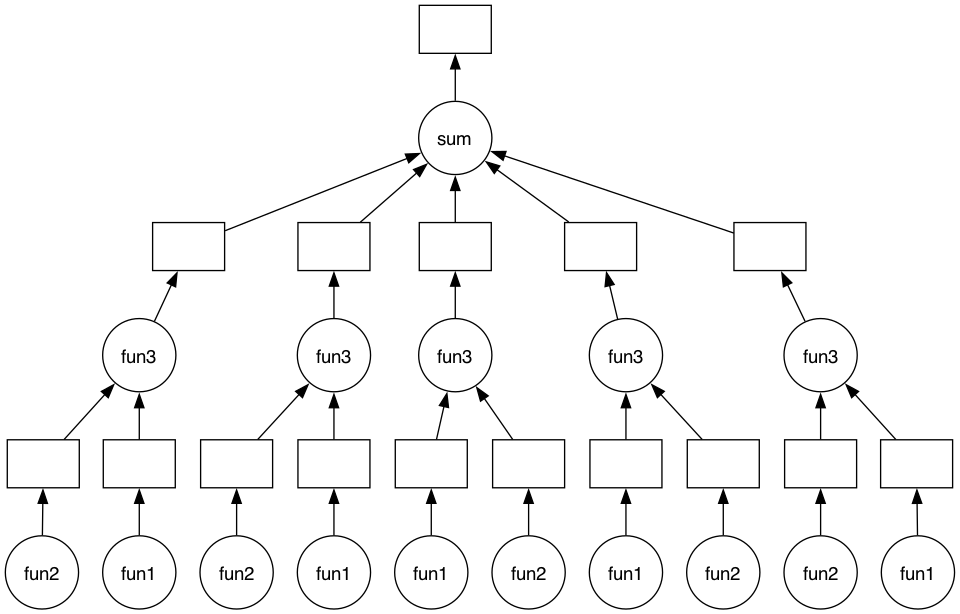

In [30]:
suma.visualize()

# Custome task graphs

In [36]:
def fun1(x,y):
    return x+y+ 2*x*y

def fun2(a,b):
    return a**3 -b**3

def fun3(p,q):
    return p*p + q*q

def fun4(x):
    return x*3


In [42]:
dsk= {
    'nodo1': (fun4,10),
    'nodo2': (fun4,20),
    'nodo3': (fun4,30),
    'nodo4': (fun4,40),
    'square_sum': (fun3,'nodo1','nodo2'),
    'a plus b plus whole square': (fun1,'square_sum','nodo3'),
    'some complex stuff': (fun2,'nodo4','a plus b plus whole square')}

In [43]:
from dask.multiprocessing import get

my_task=get(dsk,'some complex stuff')
my_task

-540526789183851000

In [50]:
import dask

dask.visualize(dsk,rankdir='LR')

# Dask dataframes

Is simply a scaled parallel version of pandas, it consist of multiple pandas dataframes

In [51]:
import dask.dataframe as daf

In [55]:
df=daf.read_csv('*.csv') #to upload all csv files in a folder
df

,total_bill,tip,sex,smoker,day,time,size
npartitions=2,,,,,,,
,float64,float64,string,string,string,string,int64
,...,...,...,...,...,...,...
,...,...,...,...,...,...,...


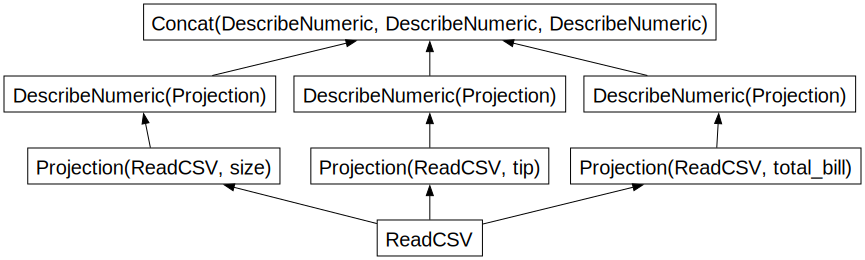

In [57]:
df.describe().visualize() #filename='desc.png' to save the image

In [58]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [60]:
df.groupby('sex')['total_bill'].sum().compute()

sex
Female    3141.90
Male      6513.64
Name: total_bill, dtype: float64

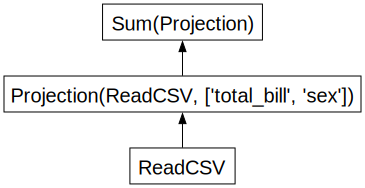

In [61]:
df.groupby('sex')['total_bill'].sum().visualize()

## Creating Dask dataframes

In [64]:
import dask.dataframe as da

df=da.read_csv('tips.csv')
len(df)

244

In [65]:
df=da.read_csv('tips*.csv') #* denotes something and ends with .csv
len(df)

488

In [66]:
import os
file_list=['tips'+ str(part) +'.csv' for part in range(2)]
file_list

['tips0.csv', 'tips1.csv']

In [83]:
len(da.read_csv(file_list))

488

## Some limitations of dask.dataframes

- For an unsorted columns, setting an indez is an expensive operation.
- Many API's are not implementes.
- Some operations are not fully supported
- Some operations are not optimized for parallel performance
- shuffling takes time.

# Dask Bags

similar to sets, dask.bags are parallel collection of python objects like map, groupby or filter.

used to parallelize simple computations

## Creating dask bags from a file

In [110]:
import dask.bag as dbag

df=dbag.read_text('tips*.csv') #* denotes something and ends with .csv
df

dask.bag<bag-from-delayed, npartitions=2>

In [111]:
df.npartitions

2

In [112]:
df.take(10)

('total_bill,tip,sex,smoker,day,time,size\n',
 '16.99,1.01,Female,No,Sun,Dinner,2\n',
 '10.34,1.66,Male,No,Sun,Dinner,3\n',
 '21.01,3.5,Male,No,Sun,Dinner,3\n',
 '23.68,3.31,Male,No,Sun,Dinner,2\n',
 '24.59,3.61,Female,No,Sun,Dinner,4\n',
 '25.29,4.71,Male,No,Sun,Dinner,4\n',
 '8.77,2.0,Male,No,Sun,Dinner,2\n',
 '26.88,3.12,Male,No,Sun,Dinner,4\n',
 '15.04,1.96,Male,No,Sun,Dinner,2\n')

## Creating dask from a list

In [113]:
# reading a list and applied map operation
names=['Ale','Pedro','Pablo','Luis','Juan']
seq_bag=dbag.from_sequence(names, npartitions=3) 
seq_bag

dask.bag<from_sequence, npartitions=3>

In [114]:
seq_bag2=seq_bag.map(lambda x: x + ' Second Name')
seq_bag2.compute()

['Ale Second Name',
 'Pedro Second Name',
 'Pablo Second Name',
 'Luis Second Name',
 'Juan Second Name']

In [115]:
seq_bag2.take(2)

('Ale Second Name', 'Pedro Second Name')

## Creating Dask bag from a URL

In [116]:
url_bag=dbag.from_url('https://gutenberg.org/cache/epub/74441/pg74441.txt')

In [117]:
url_bag.take(10)

(b'\xef\xbb\xbfThe Project Gutenberg eBook of The Sturgis wager\r\n',
 b'    \r\n',
 b'This ebook is for the use of anyone anywhere in the United States and\r\n',
 b'most other parts of the world at no cost and with almost no restrictions\r\n',
 b'whatsoever. You may copy it, give it away or re-use it under the terms\r\n',
 b'of the Project Gutenberg License included with this ebook or online\r\n',
 b'at www.gutenberg.org. If you are not located in the United States,\r\n',
 b'you will have to check the laws of the country where you are located\r\n',
 b'before using this eBook.\r\n',
 b'\r\n')

In [118]:
url_bag.npartitions

1

## Store dask bags

In [119]:
url_bag.to_textfiles('processed_*.txt')

['/Users/aleidali/code_snippets/Dask/processed_0.txt']

## Map

In [122]:
int_bag=list(range(1,20))
seq_bag=dbag.from_sequence(int_bag, npartitions=3) 
seq_bag

dask.bag<from_sequence, npartitions=3>

In [127]:
add1=seq_bag.map(lambda x: x+1)
add1.compute()

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

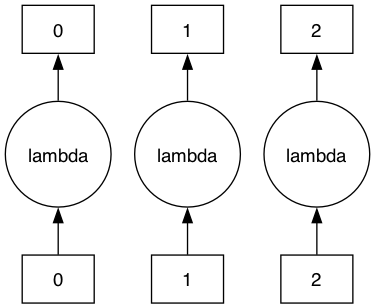

In [129]:
add1.visualize()

## Acummulate

In [130]:
from operator import mul

acum_prod=seq_bag.accumulate(mul)
acum_prod.compute()

[1,
 2,
 6,
 24,
 120,
 720,
 5040,
 40320,
 362880,
 3628800,
 39916800,
 479001600,
 6227020800,
 87178291200,
 1307674368000,
 20922789888000,
 355687428096000,
 6402373705728000,
 121645100408832000]

## Filter

In [132]:
def is_multiple_3(x):
    return x%3==0  # return a false or true

mul3=seq_bag.filter(is_multiple_3)
mul3.compute()

[3, 6, 9, 12, 15, 18]

In [134]:
is_multiple_3(10)

False

In [136]:
seq_bag.filter(lambda x: x>10).compute()

[11, 12, 13, 14, 15, 16, 17, 18, 19]

## Group by

In [137]:
seq_bag.groupby(is_multiple_3).compute()

[(True, [15, 18, 3, 6, 9, 12]),
 (False, [16, 17, 19, 1, 2, 4, 5, 7, 8, 10, 11, 13, 14])]

In [138]:
seq_bag.groupby(lambda x: x>10).compute()

[(True, [15, 16, 17, 18, 19, 11, 12, 13, 14]),
 (False, [8, 9, 10, 1, 2, 3, 4, 5, 6, 7])]

# Distributed Computing with Dask

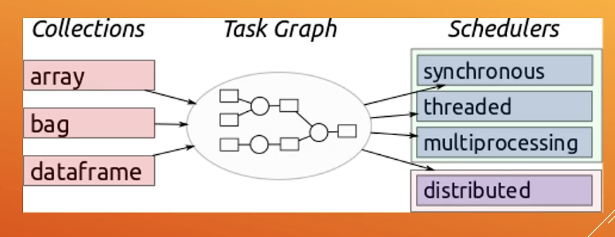

In [148]:
from dask.distributed import Client
client=Client(processes=False,threads_per_worker=2, n_workers=3, memory_limit='2GB')

/Users/aleidali/miniconda3/envs/envconda/lib/python3.11/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 63233 instead
  warnings.warn(


In [149]:
from dask.distributed import LocalCluster
my_cluster=LocalCluster()
my_client=Client(my_cluster)

/Users/aleidali/miniconda3/envs/envconda/lib/python3.11/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 63440 instead
  warnings.warn(


In [150]:
my_cluster.status

<Status.running: 'running'>

In [173]:
from dask import delayed, compute

x= list(range(2,20000,2))
y= list(range(3,30000,3))
z= list(range(5,50000,5))

In [174]:
def fun1(x,y):
    return x + y + 2*x*y

def fun2(a,b):
    return a**3 - b**3

def fun3(p,q):
    return p*p + q*q

In [176]:
final_result=[]
for i in range(0,len(x)):
    res1= delayed(fun1)(x[i],y[i])
    res2= delayed(fun2)(y[i],z[i])
    res3= delayed(fun3)(res1,res2)
    final_result.append(res3)

final_sum=delayed(sum)(final_result)

In [178]:
with dask.config.set(scheduler='processes'):
    %time _ =final_sum.compute()

/Users/aleidali/miniconda3/envs/envconda/lib/python3.11/site-packages/dask/base.py:1541: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(


CPU times: user 1.6 s, sys: 318 ms, total: 1.92 s
Wall time: 2.26 s


In [179]:
with dask.config.set(scheduler='sync'):
    %time _ =final_sum.compute()

CPU times: user 913 ms, sys: 37.8 ms, total: 951 ms
Wall time: 951 ms


In [180]:
with dask.config.set(scheduler='threading'):
    %time _ =final_sum.compute()

CPU times: user 1.04 s, sys: 69.7 ms, total: 1.11 s
Wall time: 1.12 s


# Dask ML

## Regression

In [183]:
## Regression
from dask.distributed import Client, progress
client=Client(processes=False,threads_per_worker=5,n_workers=10, memory_limit="2GB")
client

/Users/aleidali/miniconda3/envs/envconda/lib/python3.11/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 50061 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://192.168.1.65:50061/status,
Dashboard: http://192.168.1.65:50061/status,Workers: 10
Total threads: 50,Total memory: 18.63 GiB
Status: running,Using processes: False
Comm: inproc://192.168.1.65/4081/60,Workers: 10
Dashboard: http://192.168.1.65:50061/status,Total threads: 50
Started: Just now,Total memory: 18.63 GiB
Comm: inproc://192.168.1.65/4081/63,Total threads: 5
Dashboard: http://192.168.1.65:50062/status,Memory: 1.86 GiB
Nanny: None,


In [186]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge

X, y= make_regression(n_samples=10000, random_state=0, n_features=10,n_informative=6)
print( X.shape)
print(y.shape)

(10000, 10)
(10000,)


In [191]:
#without dask
model=LinearRegression()
model.fit(X,y)


LinearRegression()

In [192]:
#With dask
import joblib

with joblib.parallel_backend('dask'):
    model.fit(X,y)

## Classification



In [2]:
from dask_ml.cluster import KMeans
import dask_ml.datasets # needs numpy 2.0

In [1]:
import numpy as np
np.__version__ 


'2.0.0'

In [4]:
X,y= dask_ml.datasets.make_blobs(n_samples=500000,chunks=5000,random_state=0,centers=5)

model=KMeans(n_clusters=5,init_max_iter=20)
model.fit(X,y)

KMeans(init_max_iter=20, n_clusters=5)

In [6]:
preds=model.predict(X)
preds

dask.array<astype, shape=(500000,), dtype=int32, chunksize=(5000,), chunktype=numpy.ndarray>

In [7]:
preds.compute()

array([2, 4, 3, ..., 0, 4, 0], dtype=int32)